<a href="https://colab.research.google.com/github/Misheal-22/Customer-Segmentation-model/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [23]:
!pip install opendatasets

In [24]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Skipping, found downloaded files in "./customer-segmentation-tutorial-in-python" (use force=True to force download)


In [25]:
import pandas as pd
data=pd.read_csv("customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))



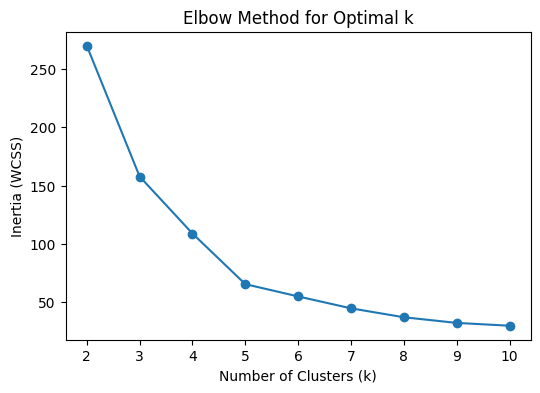

In [29]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

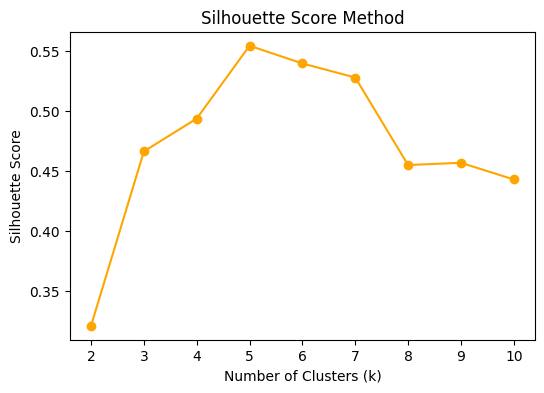

In [30]:
plt.figure(figsize=(6,4))
plt.plot(K, silhouette, marker='o', color='orange')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)


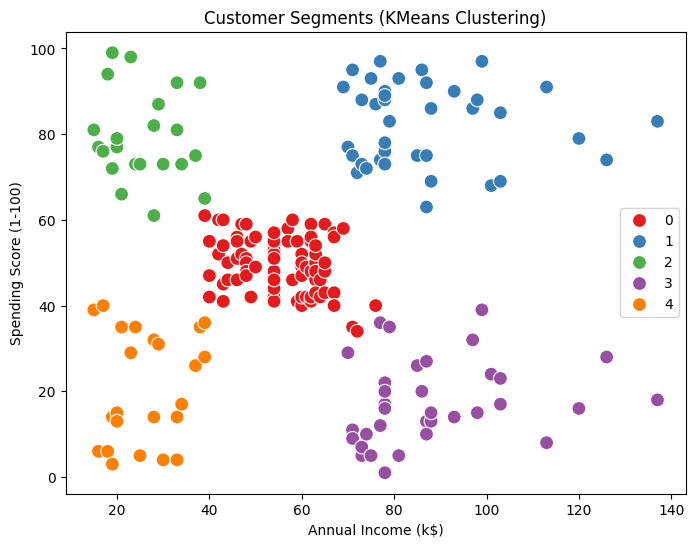

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'],
                y=X['Spending Score (1-100)'],
                hue=data['Cluster'],
                palette='Set1',
                s=100)
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [35]:
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nAverage Income & Spending per Cluster (KMeans):")
print(cluster_summary)



Average Income & Spending per Cluster (KMeans):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

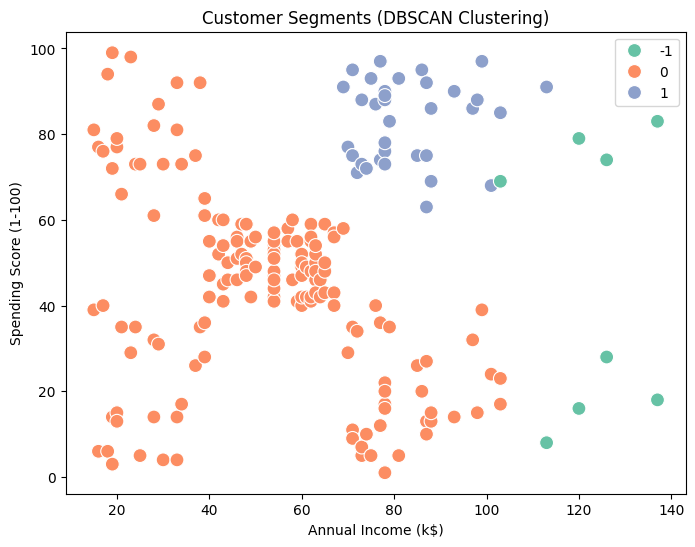

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'],
                y=X['Spending Score (1-100)'],
                hue=data['DBSCAN_Cluster'],
                palette='Set2',
                s=100)
plt.title("Customer Segments (DBSCAN Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [41]:
results = {}

In [42]:
# KMeans metrics
results["KMeans"] = {
    "Silhouette Score": silhouette_score(X_scaled, data['Cluster']),
    "Davies-Bouldin Index": davies_bouldin_score(X_scaled, data['Cluster']),
    "Calinski-Harabasz Index": calinski_harabasz_score(X_scaled, data['Cluster'])
}

# DBSCAN metrics (only valid if >1 cluster)
if len(set(data['DBSCAN_Cluster'])) > 1:
    results["DBSCAN"] = {
        "Silhouette Score": silhouette_score(X_scaled, data['DBSCAN_Cluster']),
        "Davies-Bouldin Index": davies_bouldin_score(X_scaled, data['DBSCAN_Cluster']),
        "Calinski-Harabasz Index": calinski_harabasz_score(X_scaled, data['DBSCAN_Cluster'])
    }
else:
    results["DBSCAN"] = {"Silhouette Score": "N/A", "Davies-Bouldin Index": "N/A", "Calinski-Harabasz Index": "N/A"}

# Convert to DataFrame for a clean table
metrics_df = pd.DataFrame(results).T
print("\n📊 Clustering Evaluation Metrics Comparison:\n")
print(metrics_df)


📊 Clustering Evaluation Metrics Comparison:

        Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
KMeans          0.554657              0.572236               248.649320
DBSCAN          0.350446              0.828510                60.838816
